In [2]:
from os import listdir
from os.path import isfile, join

mypath = r"C:\Users\Phil\Desktop\output\jira_issues_15\output"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [3]:
import pandas as pd
import numpy as np

temp  = {'Labels':[],'Values':[]}
df = pd.DataFrame(temp)

text = [] 
count = 0 
for file in onlyfiles:
    text = [] 
    with  open(mypath + '/' + file, "r", encoding="utf-8") as f:
        text = f.read()
        # DataFrame containing each text and each class
        df.loc[count] = [file.rsplit(sep = '_')[0], text.replace('\n','')]
        count = count+1
        
del count, temp, text

In [4]:
#Get the frequency that each class appears in our dataset
Class_freq = df.groupby("Labels").count()
print(Class_freq)
#Get the 3 classes with the most data
max_Classes = Class_freq.nlargest(3,'Values')
print("The 3 classes with the most files")
#print(Class_freq.Data.nlargest(3))

MC = max_Classes.index.tolist()

                                  Values
Labels                                  
aantonenko                          1229
ababiichuk                          1028
ancosen                              914
andrus                              1216
andy.seaborne                       1101
atkach                              1145
batik-dev@xmlgraphics.apache.org    1027
bowserj                              869
djohnson                             979
elserj                               881
jbellis                              967
julianhyde                          1111
onechiporenko                        866
purplecabbage                       1086
wesmckinn                           1141
The 3 classes with the most files


In [5]:
data = df[df.Labels == MC[0]].append([df[df.Labels == MC[1]]]).append([df[df.Labels == MC[2]]])
data.reset_index(inplace = True)
data.drop(columns = 'index', inplace= True)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english', max_df=0.6, lowercase = True)
features = vectorizer.fit_transform(data.Values)
X= pd.DataFrame(features.toarray(),columns = vectorizer.get_feature_names())

 
y = data.Labels
y.replace({MC[0]: 1, MC[1]: 2, MC[2]: 3})

0       1
1       1
2       1
3       1
4       1
       ..
3585    3
3586    3
3587    3
3588    3
3589    3
Name: Labels, Length: 3590, dtype: int64

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, random_state = 42)
X_embedded = tsne.fit_transform(X)


ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0       aantonenko
1       aantonenko
2       aantonenko
3       aantonenko
4       aantonenko
           ...    
3585        atkach
3586        atkach
3587        atkach
3588        atkach
3589        atkach
Name: Labels, Length: 3590, dtype: object.

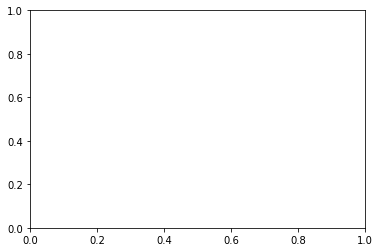

In [8]:
import matplotlib.pyplot as plt
import numpy as np

category_to_color = { 1: 'red', 2:'blue', 3: 'green'}
category_to_label = { 1: MC[0], 2:MC[1], 3: MC[2]}

colors = y.replace({ 1: 'r', 2: 'b', 3: 'g'})

plt.scatter(X_embedded[:,0], X_embedded[:,1], c =colors, s = data.Labels)
plt.legend()
plt.show()

In [ ]:
y.replace({MC[0]: 1, MC[1]: 2, MC[2]: 3}, inplace= True)